# Bike Sharing Assignment

In [4]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Import library to hide warnings

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Read the data
df = pd.read_csv("day.csv")

In [7]:
# Have a look at the data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Verify the shape of the data frame
df.shape

(730, 16)

In [9]:
# Check for data types in the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
# verify not null records in the data frame
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# Describe the data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Observations
After having a look at the data frame, 
- All the columns are not null, they must contain entries in each row. 
-  The column **_'instant'_** is just a value representing the index or row number of the data frame, which could be removed from the data frame.
-  The column **_'dteday'_** contains the day which might not be relevant for the analysis. We already have the year and month in different columns, hence it is safe to remove **_'dteday'_** as well.
-  We want to gather insights on the target variable **cnt'_**, which represents the total count of casual and registered users. Hence, we could also remove the columns **_'casual'_** and **_'registered'_** from the data frame.

## 1. Clean data and perform EDA

### 1.1 Data preparation

In [12]:
# cols to drop
drop_cols = ["instant","dteday","casual","registered"]

# remove cols from the data frame
df.drop(drop_cols,axis =1, inplace=True)

In [13]:
# verify updated dataframe
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
df.shape

(730, 12)

### Assigning string values to the required columns
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- mnth : month ( 1 to 12)
- weekday : day of the week
- weathersit : 
     - 1 : Clear, Few clouds, Partly cloudy, Partly cloudy 
	 - 2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	 - 3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	 - 4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [15]:
# Assign values to the seasons as described in the data dictionary for further analysis
df["season"] = df["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

# Assign values to months
df["mnth"] = df["mnth"].map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

# Assign values to weekdays
df["weekday"] = df["weekday"].map({0:'Tue',1:'Wed',2:'Thu',3:'Fri',4:'Sat',5:'Sun',6:'Mon'})

# Assign values to weathersit. We could classify the weathersit into 4 types as per the data dictionary
df["weathersit"] = df["weathersit"].map({1:"Clear",2:"Mist",3:"Light snow",4:"Heavy rain"})

In [16]:
# Verify updated dataframe 
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
# Checking whether the conversion is done properly or not and getting data count on the basis of season
df['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [18]:
# Checking whether the conversion is done properly or not and getting data count on the basis of month
df['mnth'].astype('category').value_counts()

Aug    62
Dec    62
Jan    62
Jul    62
Mar    62
May    62
Oct    62
Apr    60
Jun    60
Nov    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [19]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekdays
df['weekday'].astype('category').value_counts()

Mon    105
Tue    105
Wed    105
Sat    104
Sun    104
Thu    104
Fri    103
Name: weekday, dtype: int64

In [20]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekdays
df['weathersit'].astype('category').value_counts()

Clear         463
Mist          246
Light snow     21
Name: weathersit, dtype: int64

In [21]:
# year (0: 2018, 1:2019)
df['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [22]:
# whether day is a holiday or not (0: No, 1: Yes)
df['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [23]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
df['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

### 1.2 Perform EDA

In [26]:
#Auto EDA

!pip install sweetviz
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_report.html')

     ---------------------------------------- 15.1/15.1 MB 2.6 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 2. Data Visualization

- Understanding the distribution of various numeric variables 
- looking for multicollinearity

We'll visualise our data using `matplotlib` and `seaborn`.

### 2.1 Visualizing numerical variables

<AxesSubplot:xlabel='temp', ylabel='Density'>

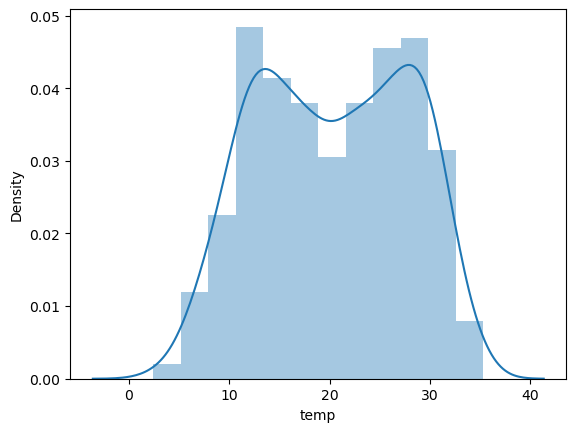

In [24]:
# Visualising temperature

sns.distplot(df['temp'])

<AxesSubplot:xlabel='atemp', ylabel='Density'>

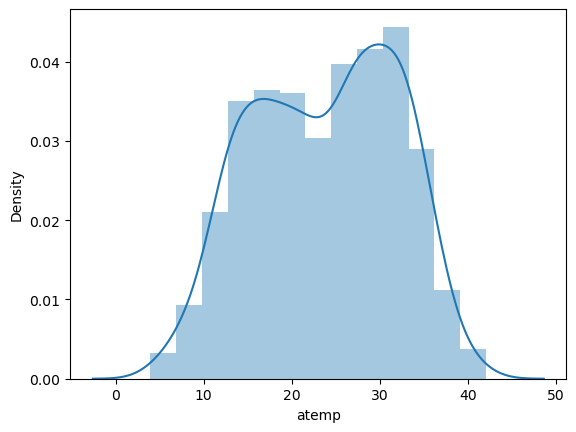

In [25]:
# Visualising feeling temperature

sns.distplot(df['atemp'])

<AxesSubplot:xlabel='hum', ylabel='Density'>

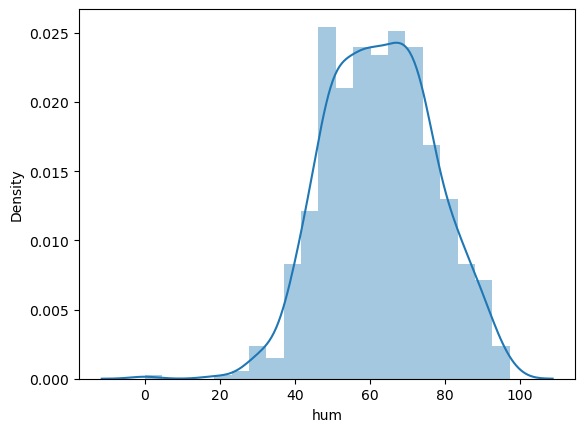

In [26]:
# Visualising humidity

sns.distplot(df['hum'])

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

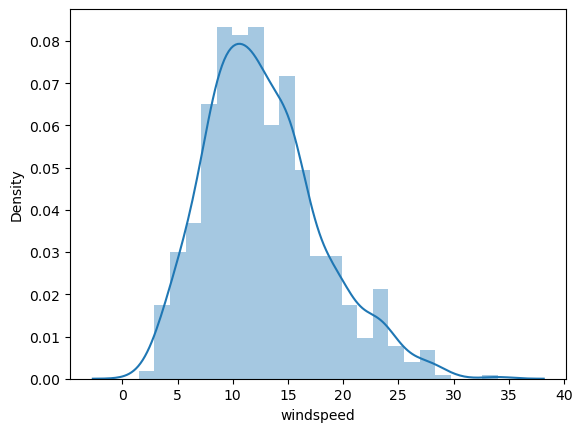

In [27]:
# Visualising wind speed

sns.distplot(df['windspeed'])

<AxesSubplot:xlabel='cnt', ylabel='Density'>

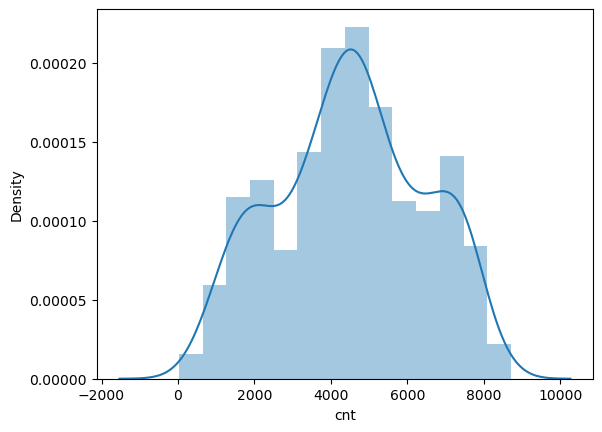

In [28]:
# Target variable: count of total rental bikes including both casual and registered

sns.distplot(df['cnt'])

### 2.2 Visualizing categorical variables

In [29]:
df_categorical = df[['season','mnth', 'weekday', 'weathersit']]

df_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,Mist
1,spring,Jan,Tue,Mist
2,spring,Jan,Wed,Clear
3,spring,Jan,Thu,Clear
4,spring,Jan,Fri,Clear
...,...,...,...,...
725,spring,Dec,Sat,Mist
726,spring,Dec,Sun,Mist
727,spring,Dec,Mon,Mist
728,spring,Dec,Tue,Clear


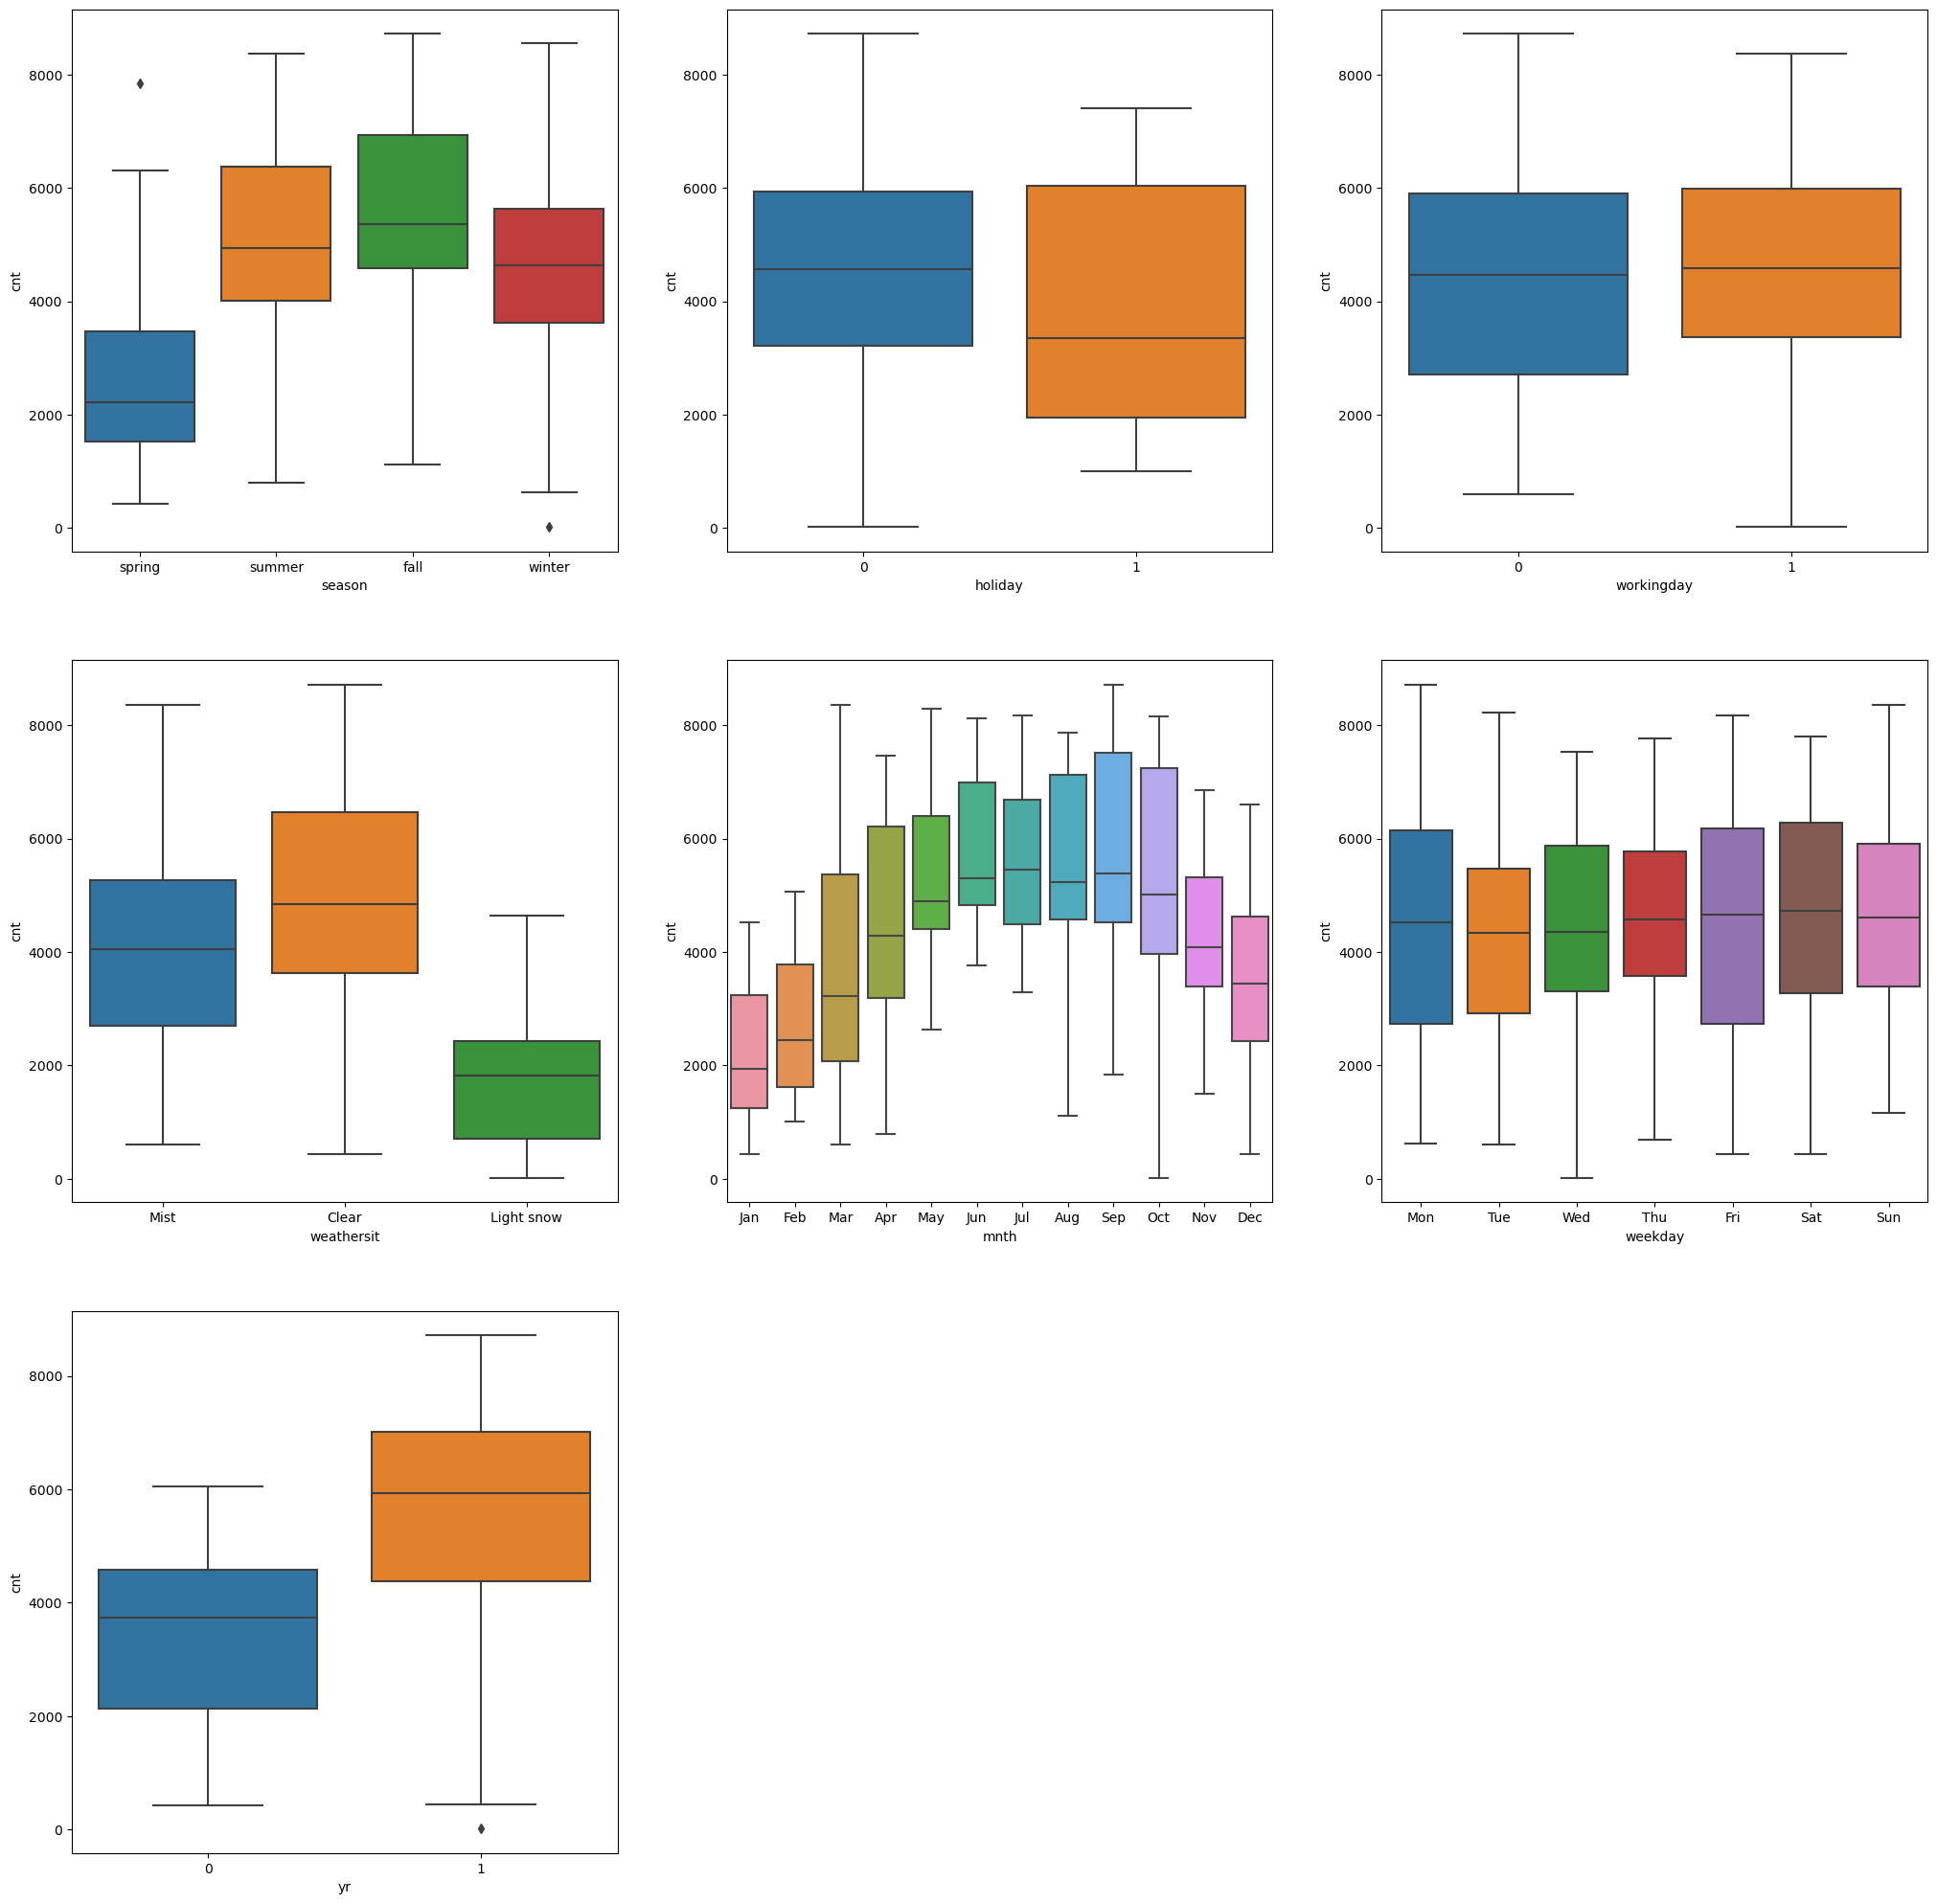

In [30]:
#  Visualise all the categorical variable using a box plot. data = df (initial csv file that was read and prepared for EDA)

plt.figure(figsize=(25, 25))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

#### 2.2.1 Visualizing individual variables

We will now visualize individual variables w.r.t to 'cnt' and note the observations

Text(0.5, 1.0, 'Rental Bikes per season')

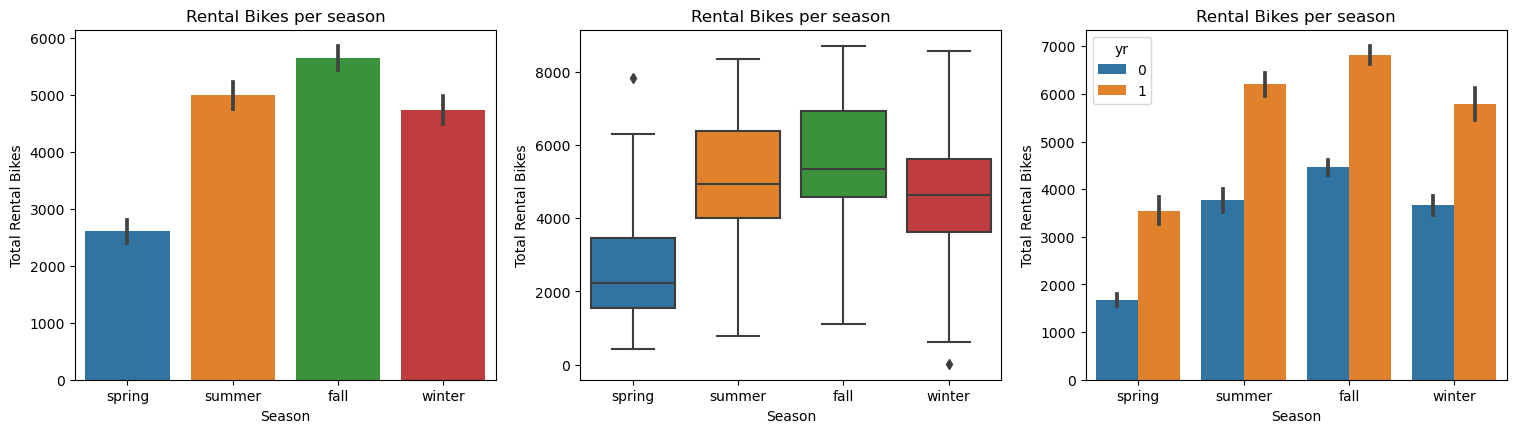

In [31]:
# Visualize season vs cnt

fig = plt.figure(figsize = (25, 10))
plt.subplot(2,4,1)
sns.barplot('season','cnt',data=df)
plt.ylabel('Total Rental Bikes')
plt.xlabel('Season')
plt.title('Rental Bikes per season')
plt.subplot(2,4,2)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.ylabel('Total Rental Bikes')
plt.xlabel('Season')
plt.title('Rental Bikes per season')
plt.subplot(2,4,3)
sns.barplot('season','cnt',data=df, hue='yr')
plt.ylabel('Total Rental Bikes')
plt.xlabel('Season')
plt.title('Rental Bikes per season')

#####  Observations:
- The usage of rental bikes is the highest in fall season.
- The average demand for rental bikes is also highest in the Fall season
- Although 2018 witnessed a lower demand for rental bikes compared to 2019, during the fall season the demand was still higher compared to other seasons.

Text(0.5, 1.0, 'Rental bike count per year')

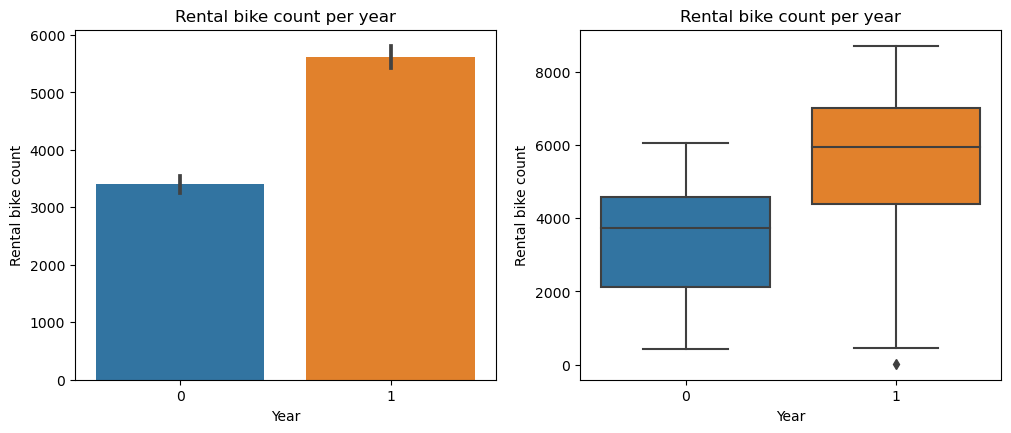

In [32]:
# Visualize Year vs cnt

fig = plt.figure(figsize = (25, 10))
plt.subplot(2,4,1)
sns.barplot('yr','cnt',data=df)
plt.ylabel('Rental bike count')
plt.xlabel('Year')
plt.title('Rental bike count per year')
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.ylabel('Rental bike count')
plt.xlabel('Year')
plt.title('Rental bike count per year')

#####  Observations:
- The overall demand for shared rental bikes were higher in the year 2019.

Text(0.5, 1.0, 'Rental bike count per month')

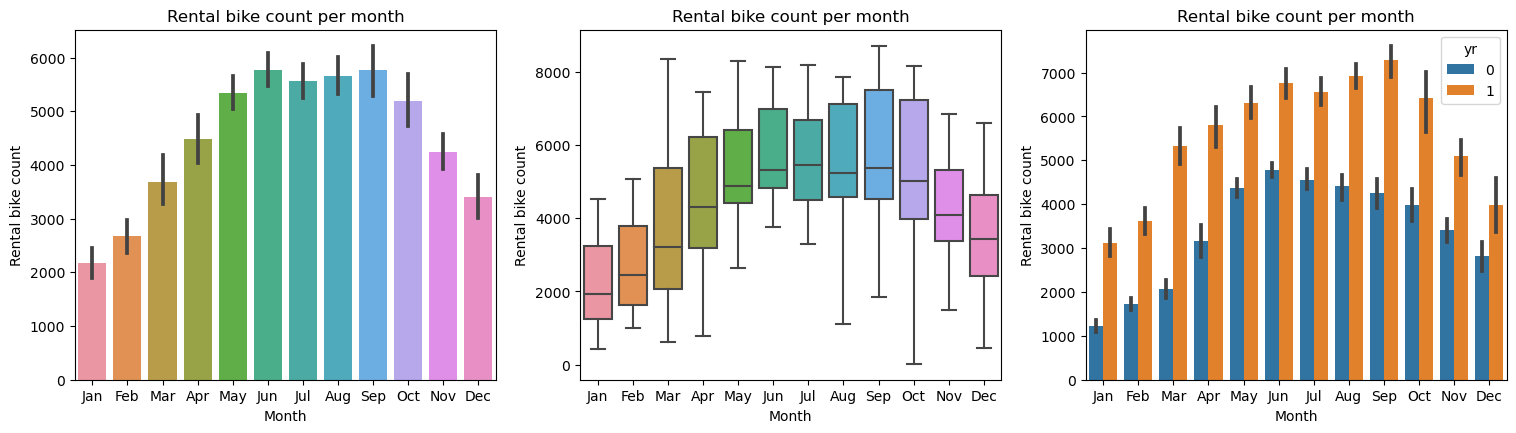

In [33]:
# Visualize Month vs cnt

fig = plt.figure(figsize = (25, 10))
plt.subplot(2,4,1)
sns.barplot('mnth','cnt',data=df)
plt.ylabel('Rental bike count')
plt.xlabel('Month')
plt.title('Rental bike count per month')
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.ylabel('Rental bike count')
plt.xlabel('Month')
plt.title('Rental bike count per month')
plt.subplot(2,4,3)
sns.barplot('mnth','cnt',data=df, hue='yr')
plt.ylabel('Rental bike count')
plt.xlabel('Month')
plt.title('Rental bike count per month')

##### Observations

- The months that lie in the fall season witnessed more demand for rental bikes, re-assuring the analysis done with '`season`' vs '`cnt`'
- Over the months, year 2019 follows a similar growth pattern as that of 2018

Text(0.5, 1.0, 'Rental bike count during holidays')

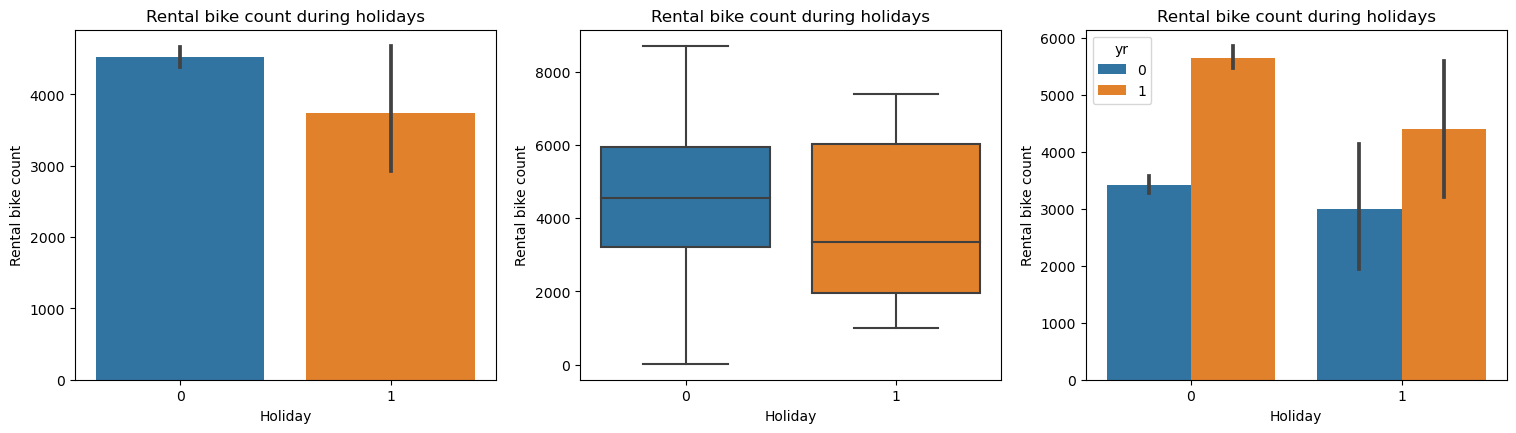

In [34]:
# Visualize holiday vs cnt

fig = plt.figure(figsize = (25, 10))
plt.subplot(2,4,1)
sns.barplot('holiday','cnt',data=df)
plt.ylabel('Rental bike count')
plt.xlabel('Holiday')
plt.title('Rental bike count during holidays')
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.ylabel('Rental bike count')
plt.xlabel('Holiday')
plt.title('Rental bike count during holidays')
plt.subplot(2,4,3)
sns.barplot('holiday','cnt',data=df, hue='yr')
plt.ylabel('Rental bike count')
plt.xlabel('Holiday')
plt.title('Rental bike count during holidays')

##### Observations

- During holidays the demand of rental bikes are less (`0: non-holiday`, `1: holiday`)
- The average rental bikes used during holidays is also less than the other days
- Both year 2018 and 2019 witnessed less utilization of rental bikes during the holidays

Text(0.5, 1.0, 'Rental bike count during weekdays')

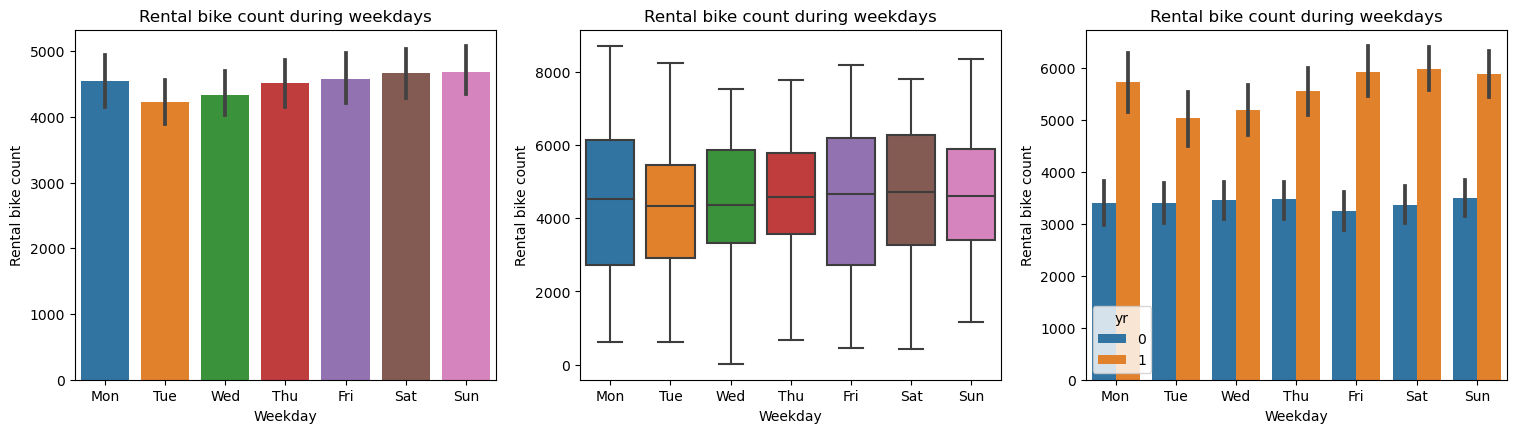

In [35]:
# Visualize weekday vs cnt

fig = plt.figure(figsize = (25, 10))
plt.subplot(2,4,1)
sns.barplot('weekday','cnt',data=df)
plt.ylabel('Rental bike count')
plt.xlabel('Weekday')
plt.title('Rental bike count during weekdays')
plt.subplot(2,4,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.ylabel('Rental bike count')
plt.xlabel('Weekday')
plt.title('Rental bike count during weekdays')
plt.subplot(2,4,3)
sns.barplot('weekday','cnt',data=df, hue='yr')
plt.ylabel('Rental bike count')
plt.xlabel('Weekday')
plt.title('Rental bike count during weekdays')

##### Obsevations

- The average demand for shared rental bikes during the weekdays doesn't have a significant difference
- The demand for shared rental bikes during weekdays in the year 2019 was more compared to that of 2018

Text(0.5, 1.0, 'Rental bike count during working days')

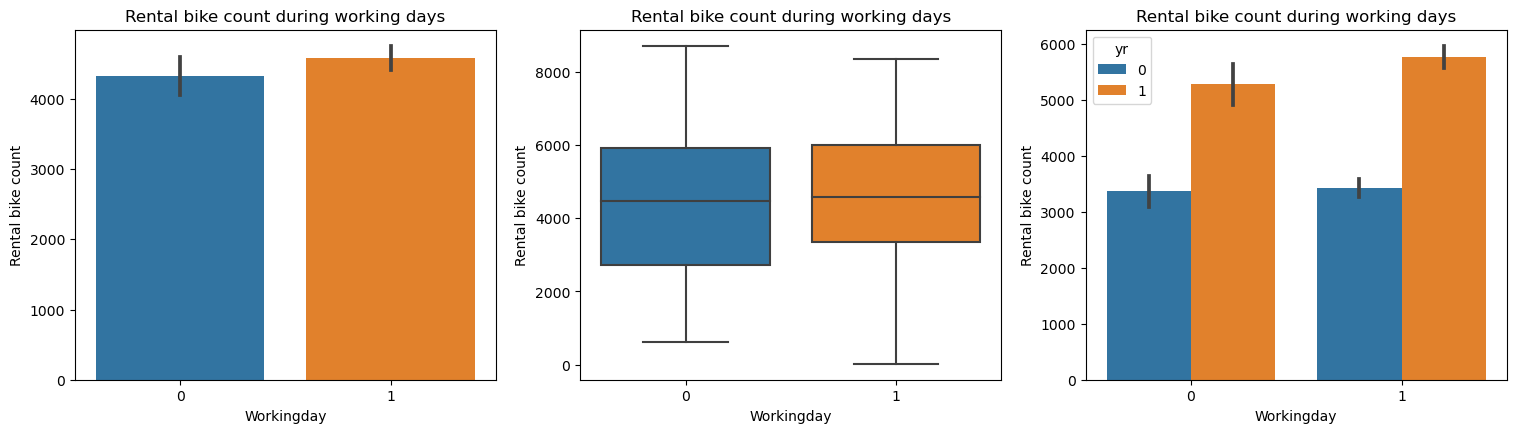

In [36]:
# Visualize workingday vs cnt

fig = plt.figure(figsize = (25, 10))
plt.subplot(2,4,1)
sns.barplot('workingday','cnt',data=df)
plt.ylabel('Rental bike count')
plt.xlabel('Workingday')
plt.title('Rental bike count during working days')
plt.subplot(2,4,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.ylabel('Rental bike count')
plt.xlabel('Workingday')
plt.title('Rental bike count during working days')
plt.subplot(2,4,3)
sns.barplot('workingday','cnt',data=df, hue='yr')
plt.ylabel('Rental bike count')
plt.xlabel('Workingday')
plt.title('Rental bike count during working days')

##### Observations

- There isn't much of a difference in the average demand for shared rental bikes on a working day compared to a non working day

Text(0.5, 1.0, 'Rental bike count in different weather situation')

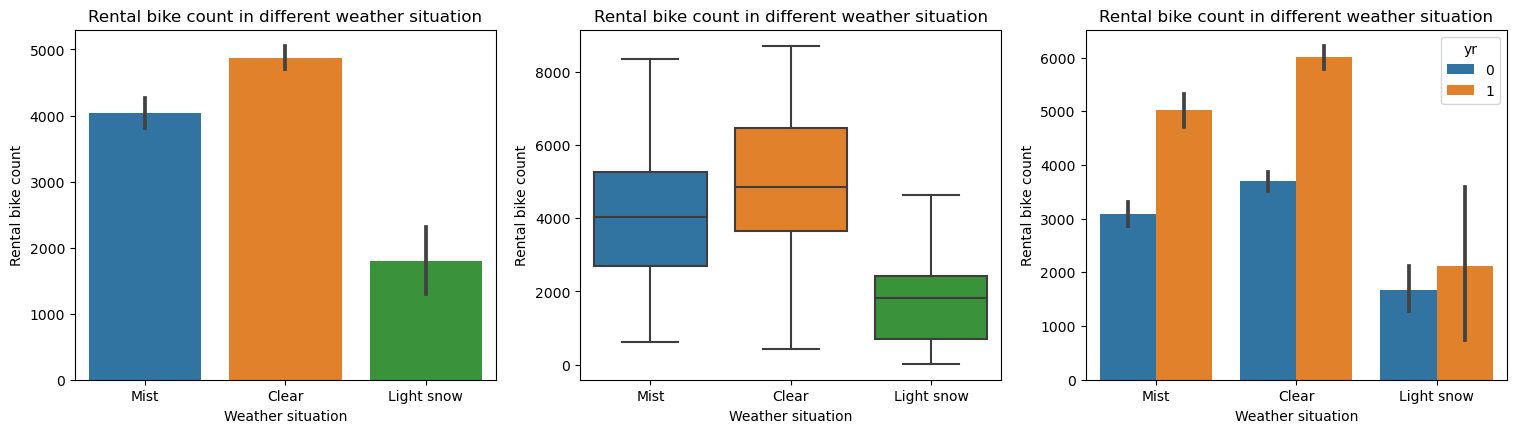

In [37]:
# Visualize weathersit vs cnt

fig = plt.figure(figsize = (25, 10))
plt.subplot(2,4,1)
sns.barplot('weathersit','cnt',data=df)
plt.ylabel('Rental bike count')
plt.xlabel('Weather situation')
plt.title('Rental bike count in different weather situation')
plt.subplot(2,4,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.ylabel('Rental bike count')
plt.xlabel('Weather situation')
plt.title('Rental bike count in different weather situation')
plt.subplot(2,4,3)
sns.barplot('weathersit','cnt',data=df, hue='yr')
plt.ylabel('Rental bike count')
plt.xlabel('Weather situation')
plt.title('Rental bike count in different weather situation')

##### Observations

- The average demand for shared rental bikes was high when the weather was clear, `i.e, clear, Few clouds, Partly cloudy, Partly cloudy`
- The average demand for rental bikes were the least when there was Light Snow, `i.e., Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds`
- There wasn't a situation of heavy rain, `i.e, Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog` in either of the years

In [38]:
# Filter out the numerical variables in the dataframe

df_numerical = df[['temp','atemp', 'hum', 'windspeed','cnt']]

df_numerical

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,2114
726,10.386653,12.75230,59.0000,10.416557,3095
727,10.386653,12.12000,75.2917,8.333661,1341
728,10.489153,11.58500,48.3333,23.500518,1796


### 2.3 Visualizing numerical variables in a scatter plot

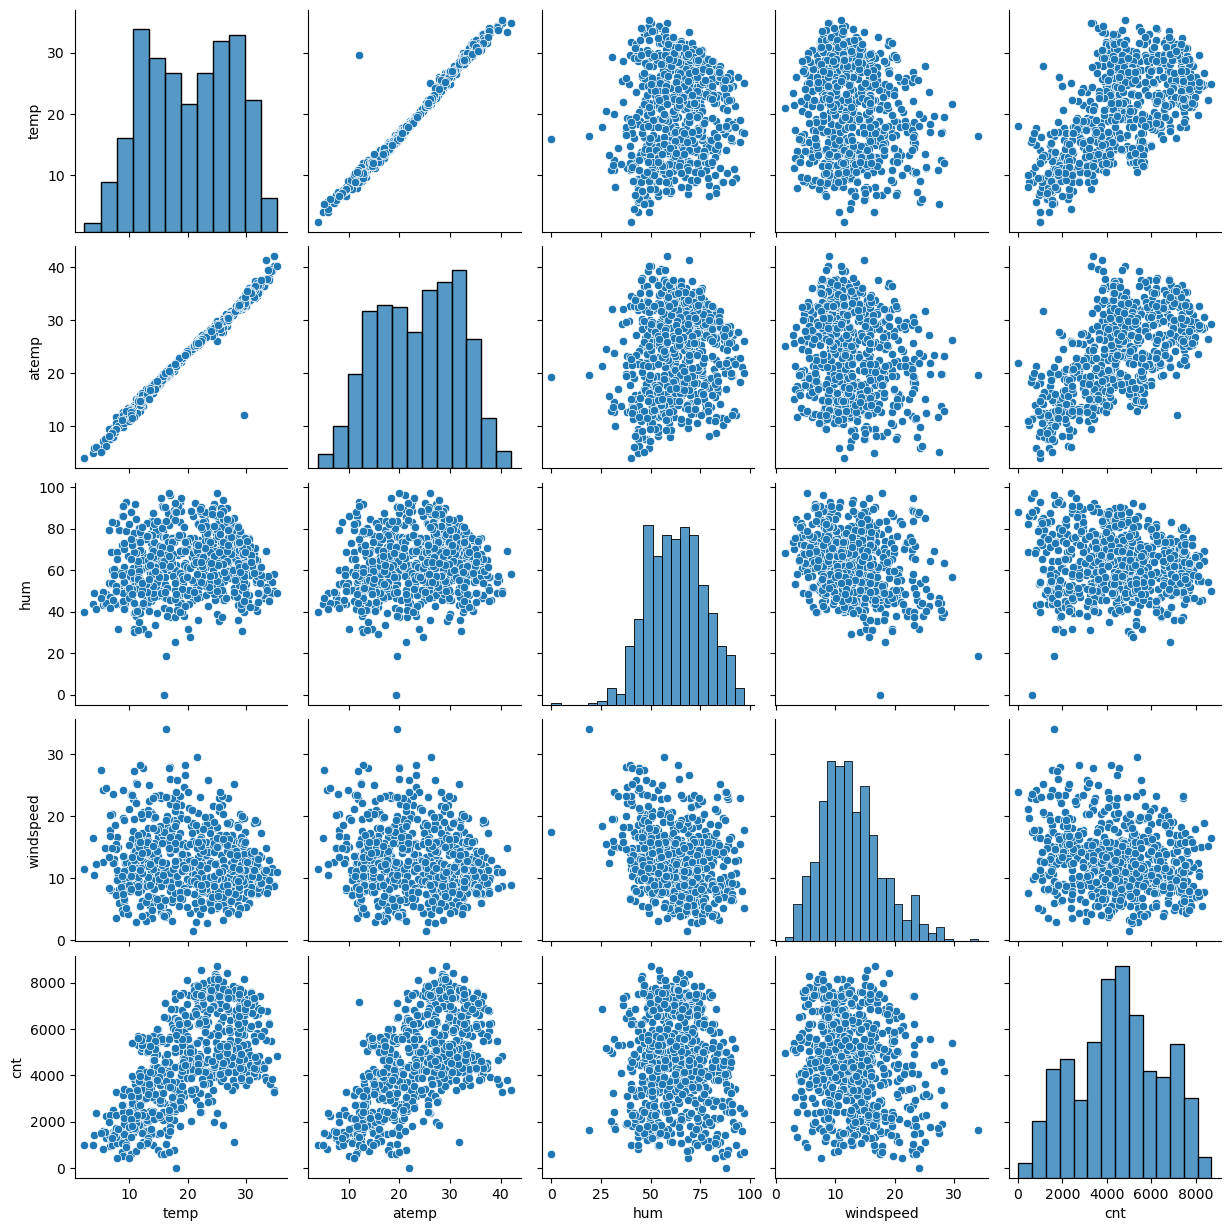

In [39]:
sns.pairplot(df_numerical)
plt.show()

##### Observation

- It looks like independent variables `temp` and `atemp` have high co-relation and could be a case of multicolinearity. We will cross check the same with correlation matrix / heat map as well.

In [40]:
# Corelation matrix

cor = df_numerical.corr()
cor

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


<AxesSubplot:>

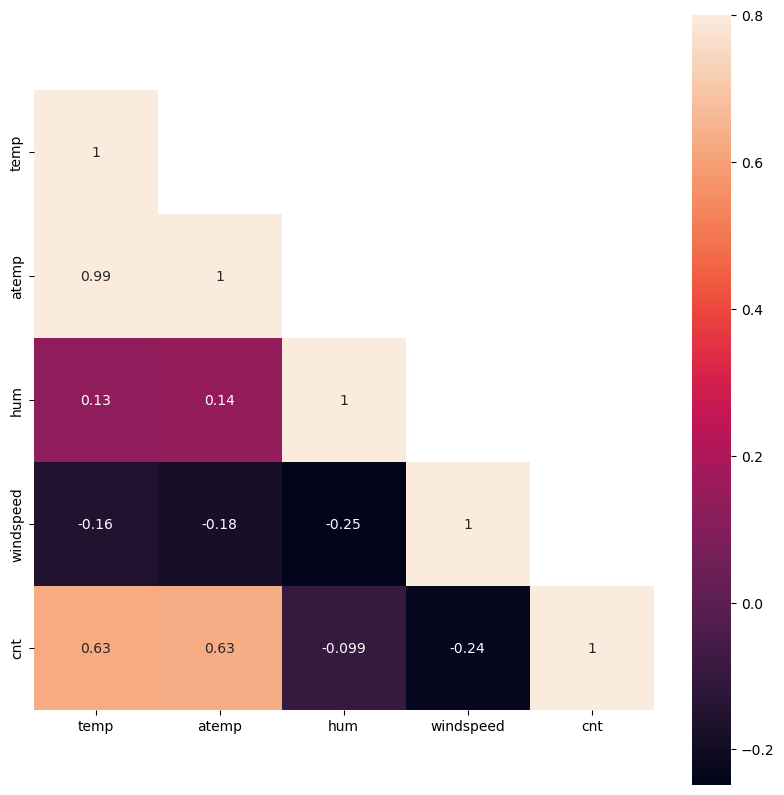

In [41]:
# Heatmap

mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

##### Observation

- The corelation matrix and heatmap validates our understanding about the independent variables `temp` and `atemp`. They have a very high co-relation almost equal to 1. 
- We have to handle this case while preparing the data for modelling.

## 3. Data Preparation for LR

In [42]:
# We observed in the heatmap that `temp` and `atemp` are highly corelated. 
# Hence to avoid multicolinearity, we will be drop `atemp` from the dataframe

df.drop('atemp',axis=1,inplace=True)

In [43]:
# Verify atemp is dropped

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [44]:
# Verify categorical cols

df_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,Mist
1,spring,Jan,Tue,Mist
2,spring,Jan,Wed,Clear
3,spring,Jan,Thu,Clear
4,spring,Jan,Fri,Clear
...,...,...,...,...
725,spring,Dec,Sat,Mist
726,spring,Dec,Sun,Mist
727,spring,Dec,Mon,Mist
728,spring,Dec,Tue,Clear


In [45]:
# Convert into dummies

df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Drop categorical variable columns and verify the final dataframe

df = df.drop(list(df_categorical.columns), axis=1)
df.head(3)

,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,1,8.050924,43.7273,16.636703,1349


In [47]:
# Concatenate dummy variables with the original dataframe

df = pd.concat([df, df_dummies], axis=1)

In [48]:
# Let's check the first few rows

df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow,weathersit_Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4. Model Building and Evaluation

- Import all the packages required for regression modelling (sklearn and statsapi)
- Split the data into test and training sets
- Scale feature usign minMax scaling
- Select relevant features for the model using RFE and build model.
- Residual analysis
- Making predictions on test data set
- evalutate the model

### 4.1 Import Libaries

In [49]:
# import libraries

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# imprt statsmodel api For VIF 

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 4.2 Split the data to train and test

In [50]:
# Split the dataframe to train and test sets

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [51]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow,weathersit_Mist
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,6664,0,1,0,...,0,0,0,0,0,0,0,1,0,1
578,1,0,1,30.852500,65.9583,8.666718,7261,0,0,0,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,1917,1,0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,10.591653,56.0833,16.292189,2739,0,0,1,...,0,0,1,0,0,0,0,0,0,1


### 4.3 Scaling

- Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. The scaling has to be done only on the train dataset as we don't want it to learn anything from the test data.
- We will scale using MinMaxScaler

In [53]:
scaler = MinMaxScaler()

In [54]:
# Apply scaler to fit and transform the training set

cols_to_scale = ['temp','hum','windspeed','cnt']
df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])

In [55]:
# verify data frame has been scaled

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow,weathersit_Mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [56]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Observation:

- The relevant variables has been scaled correctly

Since we have updated the data frame by adding new dummy variables, it might be good idea to re-visualize heat map and identify any potential multicolinearity with the new columns as well. Post validation we could proceed to feature selection and modeling.

<AxesSubplot:>

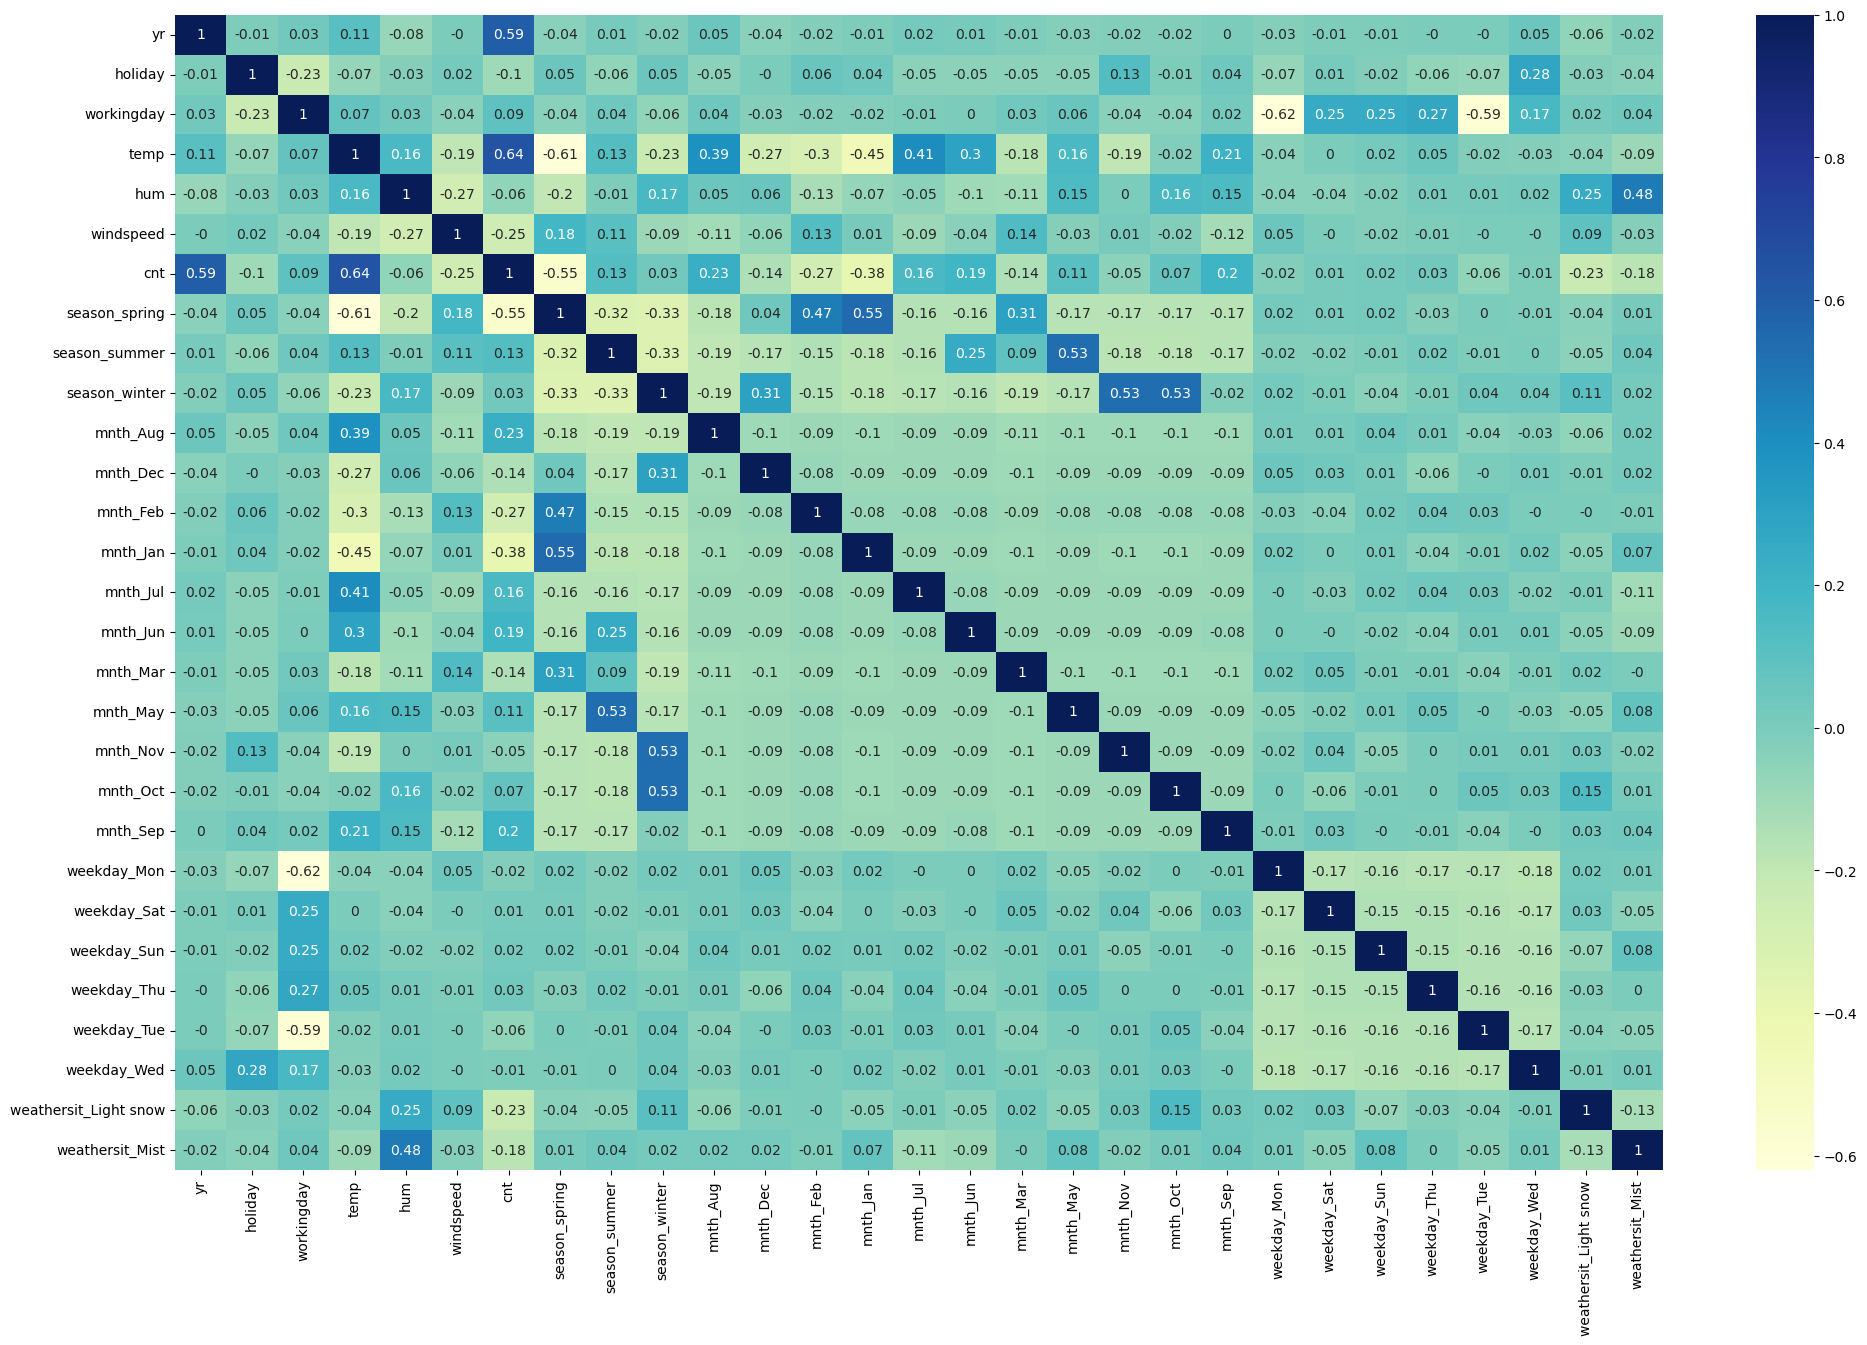

In [61]:
# Visualize corelation using heatmap

plt.figure(figsize = (24,15))
sns.heatmap(round(df_train.corr(),2), annot = True, cmap="YlGnBu")

##### Observation

- `temp` seems to the correlated to `cnt` the most

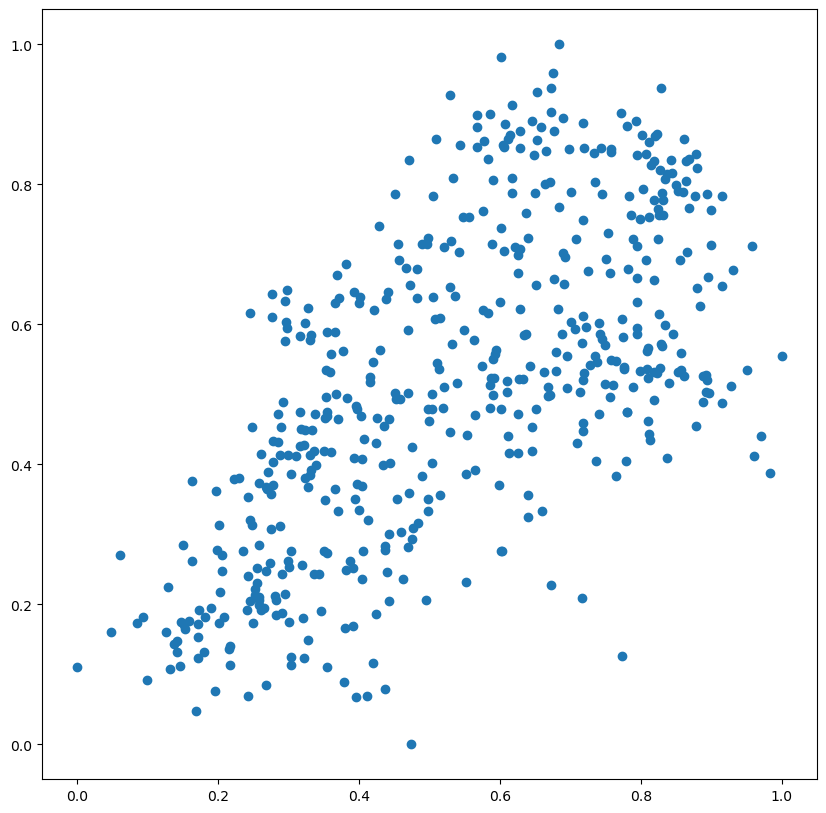

In [66]:
# Let's see a pairplot for `temp` vs `cnt`.

plt.figure(figsize=[10,10])
plt.scatter(df_train['temp'], df_train['cnt'])

### 4.4 Dividing to X and Y sets for model building

In [69]:
# Create X_train and y_train

# df_train.head(3)
y_train = df_train.pop('cnt')
X_train = df_train

In [70]:
X_train.head(3)

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow,weathersit_Mist
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [71]:
X_train.shape

(510, 28)

### 4.5 Bulding model

- We will build ou first model with all features 
- We will then use RFE to eliminate features and re-evaulate the model

#### 4.5.1 First Model

In [73]:
# Add constant to perform OLS
X_train_lm = sm.add_constant(X_train)

# Perform OLS
lr = sm.OLS(y_train, X_train_lm).fit()

# Summarize
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          8.74e-182
Time:                        12:09:20   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2429      0.035      6.854      0.000       0.173       0.313
yr                        0.2321      0.008     28.820      0.000       0.216       0.248
holiday                   0.0067      0.024      0.278      0.781      -0.041       0.054
workingday                0.0937      0.012      7.783      0.000       0.070       0.117
temp                      0.4506      0.046      9.734      0.000       0.360       0.542
hum                      -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed                -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring            -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer             0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter             0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug                  0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec                 -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb                 -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan                 -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul                 -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun                 -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar                  0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May                  0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov                 -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct                  0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sep                  0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon               0.0985      0.013      7.300      0.000       0.072       0.125
weekday_Sat              -0.0038      0.015     -0.263      0.793      -0.033       0.025
weekday_Sun               0.0054      0.015      0.362      0.718      -0.024       0.035
weekday_Thu              -0.0135      0.015     -0.917      0.359      -0.042       0.015
weekday_Tue               0.0440      0.014      3.213      0.001       0.017       0.071
weekday_Wed              -0.0155      0.015     -1.064      0.288      -0.044       0.013
weathersit_Light snow    -0.2574      0.026     -9.778      0.000      -0.309      -0.206
weathersit_Mist          -0.0611      0.010     -5.854      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarqu

In [74]:
lr.params

const                    0.242930
yr                       0.232116
holiday                  0.006726
workingday               0.093651
temp                     0.450562
hum                     -0.151340
windspeed               -0.186453
season_spring           -0.048159
season_summer            0.038725
season_winter            0.105847
mnth_Aug                 0.014404
mnth_Dec                -0.045586
mnth_Feb                -0.032282
mnth_Jan                -0.062777
mnth_Jul                -0.040350
mnth_Jun                -0.002972
mnth_Mar                 0.001045
mnth_May                 0.023940
mnth_Nov                -0.041851
mnth_Oct                 0.007534
mnth_Sep                 0.081060
weekday_Mon              0.098544
weekday_Sat             -0.003849
weekday_Sun              0.005388
weekday_Thu             -0.013502
weekday_Tue              0.044008
weekday_Wed             -0.015519
weathersit_Light snow   -0.257443
weathersit_Mist         -0.061066
dtype: float64

#### 4.5.2 Model-1 Building using RFE

In [75]:
# Instantiate
lm = LinearRegression()

In [76]:
# RFE with 17 features

rfe1 = RFE(lm, n_features_to_select = 17)

# Fit on seleted features

rfe1.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=17)

In [78]:
# verify 17 selected varaibles by RFE

list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 4),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 12),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 8),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 10),
 ('weekday_Sun', False, 9),
 ('weekday_Thu', False, 7),
 ('weekday_Tue', False, 5),
 ('weekday_Wed', False, 6),
 ('weathersit_Light snow', True, 1),
 ('weathersit_Mist', True, 1)]

We will now check the summary of the above model(with 17 features) using `statsmodel`

In [79]:
# Assign the features selected by rfe1
cols1 = X_train.columns[rfe1.support_]

# subset and create a new train set for cols1
X_train_rfe1 = X_train[cols1]

# Add constant for statsmodel
X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fit the model
lm1 = sm.OLS(y_train, X_train_rfe1).fit()

# Summarize the model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          9.55e-191
Time:                        13:37:59   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2759      0.037      7.452      0.000       0.203       0.349
yr                        0.2308      0.008     29.005      0.000       0.215       0.246
holiday                  -0.0520      0.027     -1.933      0.054      -0.105       0.001
workingday                0.0445      0.011      3.889      0.000       0.022       0.067
temp                      0.4750      0.036     13.038      0.000       0.403       0.547
hum                      -0.1474      0.037     -3.949      0.000      -0.221      -0.074
windspeed                -0.1876      0.025     -7.388      0.000      -0.237      -0.138
season_spring            -0.0611      0.021     -2.925      0.004      -0.102      -0.020
season_summer             0.0409      0.015      2.708      0.007       0.011       0.071
season_winter             0.1052      0.018      5.949      0.000       0.070       0.140
mnth_Dec                 -0.0405      0.017     -2.351      0.019      -0.074      -0.007
mnth_Jan                 -0.0458      0.018     -2.570      0.010      -0.081      -0.011
mnth_Jul                 -0.0526      0.018     -2.932      0.004      -0.088      -0.017
mnth_Nov                 -0.0420      0.018     -2.277      0.023      -0.078      -0.006
mnth_Sep                  0.0732      0.017      4.404      0.000       0.041       0.106
weekday_Mon               0.0550      0.014      3.813      0.000       0.027       0.083
weathersit_Light snow    -0.2571      0.026     -9.865      0.000      -0.308      -0.206
weathersit_Mist          -0.0598      0.010     -5.781      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       76.965   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.539
Skew:                          -0.747   Prob(JB):                     2.33e-45
Kurtosis:                       5.727   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Observation

- The new model built using RFE doesn't show much dip in the accuracy. 
- The adjusted R-sqaured value changed from **84.5% to 84.6%** 

In [80]:
# Checking for multicolinearity using VIF.
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant

df_drop_const = X_train_rfe1.drop('const',axis=1)

vif = pd.DataFrame()
vif['Features'] = df_drop_const.columns
vif['VIF'] = [variance_inflation_factor(df_drop_const.values, i) for i in range(df_drop_const.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,hum,31.16
3,temp,19.14
2,workingday,5.37
5,windspeed,4.78
6,season_spring,4.57
8,season_winter,4.12
7,season_summer,2.87
16,weathersit_Mist,2.32
0,yr,2.09
14,weekday_Mon,2.00


##### Observation for model 1 using 17 features
- `hum` and `temp` has a very high VIF score
- The p-value for `holiday` is realatively high among all other variables.

#### 4.5.3 Model-2 Building using RFE

In [81]:
# drop holiday
X_train_rfe2 = X_train_rfe1.drop(['holiday'], axis = 1)

In [86]:
# Fit the model
lm2 = sm.OLS(y_train, X_train_rfe2).fit()

# Summarize the model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          4.53e-191
Time:                        13:59:20   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2694      0.037      7.286      0.000       0.197       0.342
yr                        0.2310      0.008     28.956      0.000       0.215       0.247
workingday                0.0522      0.011      4.847      0.000       0.031       0.073
temp                      0.4729      0.037     12.953      0.000       0.401       0.545
hum                      -0.1459      0.037     -3.899      0.000      -0.219      -0.072
windspeed                -0.1880      0.025     -7.384      0.000      -0.238      -0.138
season_spring            -0.0628      0.021     -2.999      0.003      -0.104      -0.022
season_summer             0.0406      0.015      2.683      0.008       0.011       0.070
season_winter             0.1052      0.018      5.935      0.000       0.070       0.140
mnth_Dec                 -0.0415      0.017     -2.405      0.017      -0.075      -0.008
mnth_Jan                 -0.0468      0.018     -2.617      0.009      -0.082      -0.012
mnth_Jul                 -0.0516      0.018     -2.870      0.004      -0.087      -0.016
mnth_Nov                 -0.0462      0.018     -2.517      0.012      -0.082      -0.010
mnth_Sep                  0.0708      0.017      4.263      0.000       0.038       0.103
weekday_Mon               0.0627      0.014      4.513      0.000       0.035       0.090
weathersit_Light snow    -0.2568      0.026     -9.826      0.000      -0.308      -0.205
weathersit_Mist          -0.0596      0.010     -5.749      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.201   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.988
Skew:                          -0.790   Prob(JB):                     2.55e-51
Kurtosis:                       5.910   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
# Check for multicolinearity using VIF

df_drop_const2 = X_train_rfe2.drop('const',axis=1)

vif = pd.DataFrame()
vif['Features'] = df_drop_const2.columns
vif['VIF'] = [variance_inflation_factor(df_drop_const2.values, i) for i in range(df_drop_const2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.14
2,temp,18.94
4,windspeed,4.77
1,workingday,4.76
5,season_spring,4.50
7,season_winter,4.11
6,season_summer,2.86
15,weathersit_Mist,2.32
0,yr,2.09
13,weekday_Mon,1.86


##### Observation
- We see that the `mnth_Dec` has a relative high p-vlaue
- The VIF scores for model 2 has not improved significantly. So we repeat the process of feature elimination

#### 4.5.4 Model-3 

In [90]:
# drop mnth_Dec

X_train_rfe3 = X_train_rfe2.drop(['mnth_Dec'], axis = 1)

In [91]:
# Fit the model
lm3 = sm.OLS(y_train, X_train_rfe3).fit()

# Summarize the model
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.8
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          5.74e-191
Time:                        14:07:08   Log-Likelihood:                 518.94
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     494   BIC:                            -938.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2511      0.036      6.906      0.000       0.180       0.322
yr                        0.2308      0.008     28.788      0.000       0.215       0.247
workingday                0.0516      0.011      4.767      0.000       0.030       0.073
temp                      0.5011      0.035     14.418      0.000       0.433       0.569
hum                      -0.1551      0.037     -4.147      0.000      -0.229      -0.082
windspeed                -0.1846      0.026     -7.226      0.000      -0.235      -0.134
season_spring            -0.0569      0.021     -2.724      0.007      -0.098      -0.016
season_summer             0.0471      0.015      3.149      0.002       0.018       0.077
season_winter             0.0998      0.018      5.649      0.000       0.065       0.135
mnth_Jan                 -0.0358      0.017     -2.063      0.040      -0.070      -0.002
mnth_Jul                 -0.0525      0.018     -2.902      0.004      -0.088      -0.017
mnth_Nov                 -0.0289      0.017     -1.704      0.089      -0.062       0.004
mnth_Sep                  0.0762      0.017      4.608      0.000       0.044       0.109
weekday_Mon               0.0613      0.014      4.395      0.000       0.034       0.089
weathersit_Light snow    -0.2495      0.026     -9.566      0.000      -0.301      -0.198
weathersit_Mist          -0.0578      0.010     -5.559      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       73.939   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.836
Skew:                          -0.728   Prob(JB):                     2.20e-42
Kurtosis:                       5.628   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# Check for multicolinearity using VIF

df_drop_const3 = X_train_rfe3.drop('const',axis=1)

vif = pd.DataFrame()
vif['Features'] = df_drop_const3.columns
vif['VIF'] = [variance_inflation_factor(df_drop_const3.values, i) for i in range(df_drop_const3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.42
2,temp,17.74
4,windspeed,4.77
1,workingday,4.73
5,season_spring,4.50
7,season_winter,3.86
6,season_summer,2.84
14,weathersit_Mist,2.29
0,yr,2.09
12,weekday_Mon,1.84


##### Observation

We see that there is some change in the VIF value after removig the `mnth_Dec`. The overall model could be improved, we repeat the elimination process

##### 4.5.5 Model 4

In [93]:
# drop mnth_Nov due to relative high p value

X_train_rfe4 = X_train_rfe3.drop(['mnth_Nov'], axis = 1)

In [94]:
# Fit the model
lm4 = sm.OLS(y_train, X_train_rfe4).fit()

# Summarize the model
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.9
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.70e-191
Time:                        14:11:24   Log-Likelihood:                 517.44
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2418      0.036      6.715      0.000       0.171       0.313
yr                        0.2307      0.008     28.731      0.000       0.215       0.247
workingday                0.0522      0.011      4.821      0.000       0.031       0.074
temp                      0.5096      0.034     14.789      0.000       0.442       0.577
hum                      -0.1530      0.037     -4.085      0.000      -0.227      -0.079
windspeed                -0.1866      0.026     -7.301      0.000      -0.237      -0.136
season_spring            -0.0518      0.021     -2.499      0.013      -0.092      -0.011
season_summer             0.0499      0.015      3.353      0.001       0.021       0.079
season_winter             0.0934      0.017      5.399      0.000       0.059       0.127
mnth_Jan                 -0.0350      0.017     -2.009      0.045      -0.069      -0.001
mnth_Jul                 -0.0520      0.018     -2.873      0.004      -0.088      -0.016
mnth_Sep                  0.0791      0.016      4.799      0.000       0.047       0.112
weekday_Mon               0.0625      0.014      4.479      0.000       0.035       0.090
weathersit_Light snow    -0.2480      0.026     -9.497      0.000      -0.299      -0.197
weathersit_Mist          -0.0576      0.010     -5.527      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       73.547   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.646
Skew:                          -0.725   Prob(JB):                     4.00e-42
Kurtosis:                       5.621   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
# Check for multicolinearity using VIF

df_drop_const4 = X_train_rfe4.drop('const',axis=1)

vif = pd.DataFrame()
vif['Features'] = df_drop_const4.columns
vif['VIF'] = [variance_inflation_factor(df_drop_const4.values, i) for i in range(df_drop_const4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.34
2,temp,17.65
1,workingday,4.73
4,windspeed,4.71
5,season_spring,4.48
7,season_winter,3.44
6,season_summer,2.83
13,weathersit_Mist,2.28
0,yr,2.09
11,weekday_Mon,1.84


##### 4.5.6 Model 5

In [96]:
# drop mnth_Jan

X_train_rfe5 = X_train_rfe4.drop(['mnth_Jan'], axis = 1)

In [97]:
# Fit the model
lm5 = sm.OLS(y_train, X_train_rfe5).fit()

# Summarize the model
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          8.51e-192
Time:                        14:14:19   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2298      0.036      6.451      0.000       0.160       0.300
yr                        0.2300      0.008     28.580      0.000       0.214       0.246
workingday                0.0521      0.011      4.790      0.000       0.031       0.073
temp                      0.5279      0.033     15.838      0.000       0.462       0.593
hum                      -0.1578      0.037     -4.209      0.000      -0.232      -0.084
windspeed                -0.1812      0.025     -7.106      0.000      -0.231      -0.131
season_spring            -0.0565      0.021     -2.736      0.006      -0.097      -0.016
season_summer             0.0530      0.015      3.562      0.000       0.024       0.082
season_winter             0.0993      0.017      5.813      0.000       0.066       0.133
mnth_Jul                 -0.0537      0.018     -2.962      0.003      -0.089      -0.018
mnth_Sep                  0.0797      0.017      4.819      0.000       0.047       0.112
weekday_Mon               0.0622      0.014      4.438      0.000       0.035       0.090
weathersit_Light snow    -0.2455      0.026     -9.383      0.000      -0.297      -0.194
weathersit_Mist          -0.0576      0.010     -5.512      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       71.749   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.211
Skew:                          -0.707   Prob(JB):                     3.67e-41
Kurtosis:                       5.601   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
# Check for multicolinearity using VIF

df_drop_const5 = X_train_rfe5.drop('const',axis=1)

vif = pd.DataFrame()
vif['Features'] = df_drop_const5.columns
vif['VIF'] = [variance_inflation_factor(df_drop_const5.values, i) for i in range(df_drop_const5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.41
2,temp,16.87
1,workingday,4.71
4,windspeed,4.70
5,season_spring,4.18
7,season_winter,3.40
6,season_summer,2.83
12,weathersit_Mist,2.28
0,yr,2.08
10,weekday_Mon,1.84


##### Observation

Most of the p-values are low. Howevert, the VIF values are high. So we can now remove the variables with high VIF score

##### 4.5.7 Model 6

In [99]:
# drop hum

X_train_rfe6 = X_train_rfe5.drop(['hum'], axis = 1)

In [100]:
# Fit the model
lm6 = sm.OLS(y_train, X_train_rfe6).fit()

# Summarize the model
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          3.28e-189
Time:                        14:18:02   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1493      0.031      4.886      0.000       0.089       0.209
yr                        0.2338      0.008     28.766      0.000       0.218       0.250
workingday                0.0547      0.011      4.962      0.000       0.033       0.076
temp                      0.4925      0.033     15.020      0.000       0.428       0.557
windspeed                -0.1500      0.025     -6.047      0.000      -0.199      -0.101
season_spring            -0.0662      0.021     -3.174      0.002      -0.107      -0.025
season_summer             0.0469      0.015      3.117      0.002       0.017       0.076
season_winter             0.0851      0.017      4.997      0.000       0.052       0.119
mnth_Jul                 -0.0489      0.018     -2.657      0.008      -0.085      -0.013
mnth_Sep                  0.0738      0.017      4.408      0.000       0.041       0.107
weekday_Mon               0.0666      0.014      4.688      0.000       0.039       0.094
weathersit_Light snow    -0.2892      0.024    -11.845      0.000      -0.337      -0.241
weathersit_Mist          -0.0830      0.009     -9.581      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       72.688   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.799
Skew:                          -0.721   Prob(JB):                     4.51e-41
Kurtosis:                       5.581   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# Check for multicolinearity using VIF

df_drop_const6 = X_train_rfe6.drop('const',axis=1)

vif = pd.DataFrame()
vif['Features'] = df_drop_const6.columns
vif['VIF'] = [variance_inflation_factor(df_drop_const6.values, i) for i in range(df_drop_const6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
4,season_spring,2.38
5,season_summer,2.31
0,yr,2.07
6,season_winter,1.92
9,weekday_Mon,1.83
7,mnth_Jul,1.58
11,weathersit_Mist,1.56


##### Observation

- Dropping the `hum` significantly reduced the VIF scores, which is a a good sign.
- The p-values are still low and the adjusted R square **83.7%**

##### 4.5.8 Model 7

In [102]:
# drop workingday

X_train_rfe7 = X_train_rfe6.drop(['workingday'], axis = 1)

In [103]:
# Fit the model
lm7 = sm.OLS(y_train, X_train_rfe7).fit()

# Summarize the model
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.0
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          3.37e-185
Time:                        14:24:05   Log-Likelihood:                 494.09
No. Observations:                 510   AIC:                            -964.2
Df Residuals:                     498   BIC:                            -913.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1937      0.030      6.478      0.000       0.135       0.252
yr                        0.2343      0.008     28.175      0.000       0.218       0.251
temp                      0.4941      0.034     14.725      0.000       0.428       0.560
windspeed                -0.1520      0.025     -5.988      0.000      -0.202      -0.102
season_spring            -0.0691      0.021     -3.235      0.001      -0.111      -0.027
season_summer             0.0460      0.015      2.989      0.003       0.016       0.076
season_winter             0.0805      0.017      4.627      0.000       0.046       0.115
mnth_Jul                 -0.0519      0.019     -2.756      0.006      -0.089      -0.015
mnth_Sep                  0.0731      0.017      4.262      0.000       0.039       0.107
weekday_Mon               0.0229      0.011      2.008      0.045       0.000       0.045
weathersit_Light snow    -0.2817      0.025    -11.293      0.000      -0.331      -0.233
weathersit_Mist          -0.0801      0.009     -9.052      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       76.903   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.310
Skew:                          -0.792   Prob(JB):                     1.16e-39
Kurtosis:                       5.434   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
# Check for multicolinearity using VIF

df_drop_const7 = X_train_rfe7.drop('const',axis=1)

vif = pd.DataFrame()
vif['Features'] = df_drop_const7.columns
vif['VIF'] = [variance_inflation_factor(df_drop_const7.values, i) for i in range(df_drop_const7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.12
2,windspeed,4.62
4,season_summer,2.22
3,season_spring,2.08
0,yr,2.07
5,season_winter,1.79
6,mnth_Jul,1.58
10,weathersit_Mist,1.54
7,mnth_Sep,1.33
8,weekday_Mon,1.18


##### Observation

We see that there is a reduction in the VIF scores. However, we still need to improve our model. It could be possible that the seasons are affecting the VIF score of `temp`.

##### 4.5.9 Model 8


In [105]:
# drop season_summer
X_train_rfe8 = X_train_rfe7.drop(['season_summer'], axis = 1)

In [106]:
# Fit the model
lm8 = sm.OLS(y_train, X_train_rfe8).fit()

# Summarize the model
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.7
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.74e-184
Time:                        14:28:30   Log-Likelihood:                 489.56
No. Observations:                 510   AIC:                            -957.1
Df Residuals:                     499   BIC:                            -910.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2468      0.024     10.188      0.000       0.199       0.294
yr                        0.2350      0.008     28.035      0.000       0.218       0.251
temp                      0.4534      0.031     14.669      0.000       0.393       0.514
windspeed                -0.1437      0.025     -5.650      0.000      -0.194      -0.094
season_spring            -0.1136      0.015     -7.385      0.000      -0.144      -0.083
season_winter             0.0441      0.013      3.521      0.000       0.020       0.069
mnth_Jul                 -0.0725      0.018     -4.105      0.000      -0.107      -0.038
mnth_Sep                  0.0538      0.016      3.359      0.001       0.022       0.085
weekday_Mon               0.0225      0.011      1.961      0.050   -4.34e-05       0.045
weathersit_Light snow    -0.2829      0.025    -11.255      0.000      -0.332      -0.234
weathersit_Mist          -0.0796      0.009     -8.933      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       75.927   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.636
Skew:                          -0.771   Prob(JB):                     1.33e-40
Kurtosis:                       5.503   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
# Check for multicolinearity using VIF

df_drop_const8 = X_train_rfe8.drop('const',axis=1)

vif = pd.DataFrame()
vif['Features'] = df_drop_const8.columns
vif['VIF'] = [variance_inflation_factor(df_drop_const8.values, i) for i in range(df_drop_const8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.64
2,windspeed,4.02
0,yr,2.06
3,season_spring,1.64
9,weathersit_Mist,1.51
4,season_winter,1.39
5,mnth_Jul,1.35
6,mnth_Sep,1.20
7,weekday_Mon,1.18
8,weathersit_Light snow,1.08


##### Observation

We now see that dropping `season_summer` gave a better VIF score. However, the p-value for `weekday_Mon` is relatively high.


##### 4.5.10 Model 9

In [109]:
# drop weekday_Mon
X_train_rfe9 = X_train_rfe8.drop(['weekday_Mon'], axis = 1)

In [110]:
# Fit the model
lm9 = sm.OLS(y_train, X_train_rfe9).fit()

# Summarize the model
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     267.7
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          6.95e-185
Time:                        14:33:06   Log-Likelihood:                 487.60
No. Observations:                 510   AIC:                            -955.2
Df Residuals:                     500   BIC:                            -912.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2503      0.024     10.331      0.000       0.203       0.298
yr                        0.2345      0.008     27.911      0.000       0.218       0.251
temp                      0.4521      0.031     14.589      0.000       0.391       0.513
windspeed                -0.1415      0.025     -5.553      0.000      -0.192      -0.091
season_spring            -0.1136      0.015     -7.361      0.000      -0.144      -0.083
season_winter             0.0444      0.013      3.533      0.000       0.020       0.069
mnth_Jul                 -0.0718      0.018     -4.055      0.000      -0.107      -0.037
mnth_Sep                  0.0540      0.016      3.364      0.001       0.022       0.086
weathersit_Light snow    -0.2822      0.025    -11.197      0.000      -0.332      -0.233
weathersit_Mist          -0.0794      0.009     -8.885      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       68.954   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.627
Skew:                          -0.685   Prob(JB):                     4.43e-39
Kurtosis:                       5.537   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
# Check for multicolinearity using VIF

df_drop_const9 = X_train_rfe9.drop('const',axis=1)

vif = pd.DataFrame()
vif['Features'] = df_drop_const9.columns
vif['VIF'] = [variance_inflation_factor(df_drop_const9.values, i) for i in range(df_drop_const9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.60
2,windspeed,4.00
0,yr,2.06
3,season_spring,1.63
8,weathersit_Mist,1.51
4,season_winter,1.38
5,mnth_Jul,1.35
6,mnth_Sep,1.20
7,weathersit_Light snow,1.08


##### Observation

- We see that all the VIF values are less than 5, which is acceptable values for a model
- We also see that the p-values are very low for most of the variables. `mnth_Sep` has some p-value but we can ignore it as it very very small.

Let's try creating one last model to see if there is a significant increase in the scores if we remove `mnth_Sep`


##### 4.5.11 Model 10

In [112]:
# drop mnth_Sep

X_train_rfe10 = X_train_rfe9.drop(['mnth_Sep'], axis = 1)

In [113]:
# Fit the model
lm10 = sm.OLS(y_train, X_train_rfe10).fit()

# Summarize the model
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     293.7
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.04e-183
Time:                        14:42:03   Log-Likelihood:                 481.89
No. Observations:                 510   AIC:                            -945.8
Df Residuals:                     501   BIC:                            -907.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2491      0.024     10.177      0.000       0.201       0.297
yr                        0.2339      0.008     27.568      0.000       0.217       0.251
temp                      0.4688      0.031     15.173      0.000       0.408       0.530
windspeed                -0.1492      0.026     -5.823      0.000      -0.200      -0.099
season_spring            -0.1148      0.016     -7.363      0.000      -0.145      -0.084
season_winter             0.0437      0.013      3.442      0.001       0.019       0.069
mnth_Jul                 -0.0829      0.018     -4.720      0.000      -0.117      -0.048
weathersit_Light snow    -0.2774      0.025    -10.911      0.000      -0.327      -0.227
weathersit_Mist          -0.0779      0.009     -8.637      0.000      -0.096      -0.060
==============================================================================
Omnibus:                       66.438   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.765
Skew:                          -0.653   Prob(JB):                     1.85e-38
Kurtosis:                       5.543   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
# Check for multicolinearity using VIF

df_drop_const10 = X_train_rfe10.drop('const',axis=1)

vif = pd.DataFrame()
vif['Features'] = df_drop_const10.columns
vif['VIF'] = [variance_inflation_factor(df_drop_const10.values, i) for i in range(df_drop_const10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.19
2,windspeed,3.95
0,yr,2.06
3,season_spring,1.63
7,weathersit_Mist,1.51
4,season_winter,1.38
5,mnth_Jul,1.31
6,weathersit_Light snow,1.08


##### Observations

- We see that the VIF scores improved
- We also see that there isn't significant improvement in the adjusted r-squared values
- The p-values are also relatively low.`season_winter` has a very very low p-value. We already saw that it is acceptable and there isn't much improvement in removing that variable.

Hence we can say that **Model 10** is a accepted model with a good accuracy.


### 4.6 Resiual Analysis


In [115]:
# View the valid model
X_train_rfe10

,const,yr,temp,windspeed,season_spring,season_winter,mnth_Jul,weathersit_Light snow,weathersit_Mist
653,1.0,1,0.509887,0.300794,0,1,0,0,0
576,1.0,1,0.815169,0.264686,0,0,1,0,0
426,1.0,1,0.442393,0.255342,1,0,0,0,1
728,1.0,1,0.245101,0.663106,1,0,0,0,0
482,1.0,1,0.395666,0.188475,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,0,0,0,1
578,1.0,1,0.863973,0.187140,0,0,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0,0,0
350,1.0,0,0.248216,0.431816,0,1,0,0,1


In [116]:
# Predict y train
y_train_pred = lm10.predict(X_train_rfe10)

Text(0.5, 0, 'Errors')

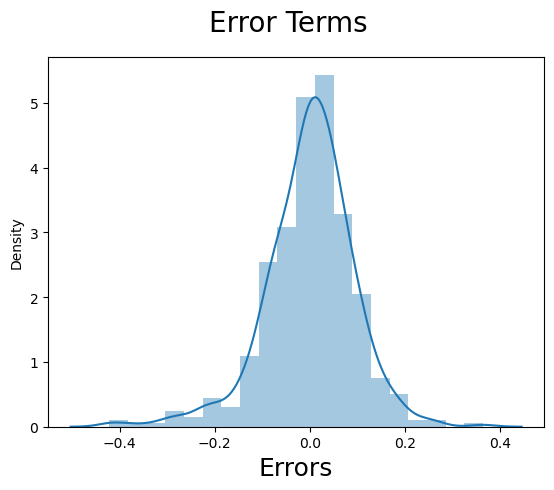

In [117]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

### 4.7 Make Predictions on Test set

##### 4.7.1 Scale the Test set

In [119]:
# use the same cols to transform the test dataset that were earlier used for train dataset

# just for reference that was used earlier

cols_to_scale

['temp', 'hum', 'windspeed', 'cnt']

In [120]:
df_test[cols_to_scale] = scaler.transform(df_test[cols_to_scale])

In [121]:
# Verify head
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow,weathersit_Mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [122]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
# Split the 'df_test' set into X and y after scaling

y_test = df_test.pop('cnt')
X_test = df_test

#### 4.7.2 Making prediction

In [128]:
# Identify columns selected by the final model - model 10

cols_selected_by_model = X_train_rfe10.drop('const', axis=1).columns
cols_selected_by_model

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_Jul',
       'weathersit_Light snow', 'weathersit_Mist'],
      dtype='object')

In [129]:
# Subset the test dataset 
X_test_new = X_test[cols_selected_by_model]

In [131]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
X_test_new

,const,yr,temp,windspeed,season_spring,season_winter,mnth_Jul,weathersit_Light snow,weathersit_Mist
184,1.0,0,0.831783,0.084219,0,0,1,0,1
535,1.0,1,0.901354,0.153728,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,1,0,0,1
221,1.0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
400,1.0,1,0.257562,0.287411,1,0,0,0,1
702,1.0,1,0.519232,0.283397,0,1,0,0,0
127,1.0,0,0.584649,0.069510,0,0,0,0,0
640,1.0,1,0.745598,0.052115,0,1,0,0,1


In [132]:
# Making predictions

y_pred = lm10.predict(X_test_new)

Text(0, 0.5, 'y_pred')

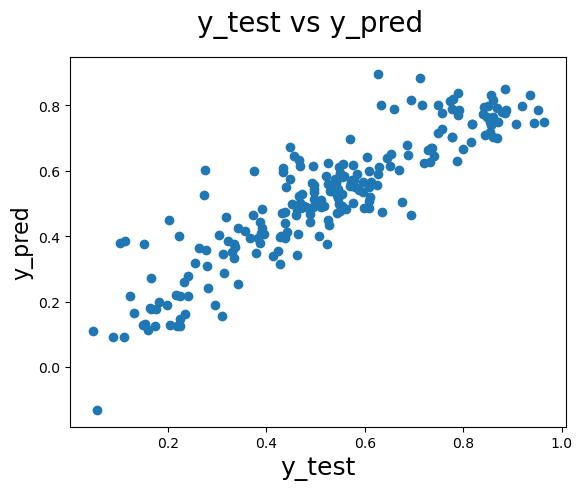

In [133]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'y_pred')

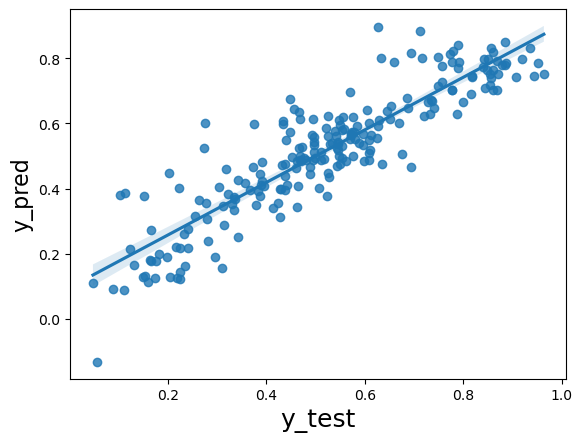

In [134]:
# Visualising with sns and matplotlib

sns.regplot(x=y_test, y=y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### 4.7.3 Calculate R-Squared

In [135]:
# r2 score evaluation
r2 = r2_score(y_test, y_pred)
r2

0.8041150453586843

##### Observation
- We see that the r2 score for test data set is 80.4% and it was 82.4% in the train set

In [136]:
# Verify params 

lm10.params

const                    0.249059
yr                       0.233928
temp                     0.468834
windspeed               -0.149247
season_spring           -0.114753
season_winter            0.043695
mnth_Jul                -0.082947
weathersit_Light snow   -0.277400
weathersit_Mist         -0.077897
dtype: float64

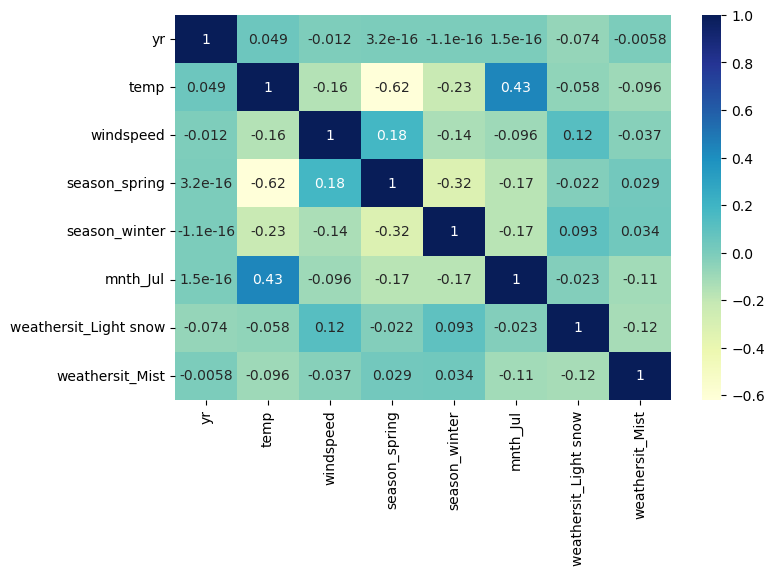

In [137]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(df[cols_selected_by_model].corr(), cmap="YlGnBu", annot=True)
plt.show()

## 5. Final observations

- Equation of best fit line

**cnt** = 0.249 + 0.233(**yr**) + 0.468(**temp**) - 0.149(**windspeed**) -0.114(**season_spring**) + 0.043(**season_winter**) -0.082(**mnth_July**) - -0.277(**weathersit_Light snow**) -0.077(**weathersit_Mist**)

- The top predictor variable are the ones with highest coefficient
    - temp with a coefficient value of 0.468
    - weathersit_Light snow with a negative coeff value of -0.277
    - windspeed with a negative coeff value of  -0.149